In [1]:
# =============================================================================
# BLOQUE DE COMPARACIÓN DE MODELOS (VERSIÓN MEJORADA)
# Incluye la columna 'calificacion' como una característica numérica
# para potenciar el entrenamiento de los modelos.
# =============================================================================

# --- 1. IMPORTACIÓN DE LIBRERÍAS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.feature_extraction.text import TfidfVectorizer # Para vectorizar texto
from sklearn.preprocessing import StandardScaler # Para escalar características numéricas
from sklearn.compose import ColumnTransformer # Para aplicar diferentes transformaciones a diferentes columnas
from sklearn.pipeline import Pipeline # Para crear pipelines de procesamiento
from sklearn.metrics import classification_report, confusion_matrix # Para evaluar los modelos

# Importación de todos los modelos a comparar
from sklearn.linear_model import LogisticRegression # Para regresión logística
from sklearn.svm import LinearSVC # Para SVM lineal
from sklearn.tree import DecisionTreeClassifier # Para árbol de decisión
from sklearn.ensemble import RandomForestClassifier # Para Random Forest
from sklearn.naive_bayes import MultinomialNB # Para Naive Bayes
from sklearn.neural_network import MLPClassifier # Para red neuronal básica

print("Librerías importadas correctamente.")


# --- 2. CARGA Y PREPARACIÓN DE DATOS ---
try:
    df = pd.read_csv('/home/cesar_r/Documentos/UAM/9no_Trimestre/Ingeneria_Software/cosmitos-imperiales/datos_excel/comentarios_limpios.csv')
    print(f"Archivo 'tus_datos_etiquetados.csv' cargado. Total de muestras: {len(df)}")
except FileNotFoundError:
    print("Error: No se encontró el archivo. Asegúrate de que el nombre es correcto.")
    raise

# Limpieza básica
df.dropna(subset=['comentarios', 'calificacion', 'Clasificacion'], inplace=True)

# ¡CAMBIO IMPORTANTE! Ahora X es un DataFrame con DOS columnas.
X = df[['comentarios', 'calificacion']]
y = df['Clasificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")


# --- 3. DEFINICIÓN DEL PREPROCESADOR Y LOS MODELOS ---

# Crear el preprocesador con ColumnTransformer
# Este objeto aplicará diferentes transformaciones a diferentes columnas.
preprocessor = ColumnTransformer(
    transformers=[
        # Transformador para la columna de texto 'comentarios'
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2)), 'comentarios'),
        
        # Transformador para la columna numérica 'calificacion'
        ('scaler', StandardScaler(), ['calificacion'])
    ],
    remainder='passthrough' # Mantiene otras columnas si las hubiera (en este caso no hay)
)

# Diccionario de modelos a probar (igual que antes)
models = {
    "Regresión Logística": LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42),
    "SVM Lineal (LinearSVC)": LinearSVC(class_weight='balanced', random_state=42, dual=True, max_iter=4000),
    "Árbol de Decisión": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    "Naive Bayes Multinomial": MultinomialNB(), # NOTA: Este modelo fallará y lo manejaremos.
    "Red Neuronal Básica (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, early_stopping=True)
}

# Nombres de las clases para los reportes y gráficos
target_names = ['Detractor (-1)', 'Neutro (0)', 'Promotor (1)']
class_labels = ['Detractor', 'Neutro', 'Promotor']


# --- 4. BUCLE DE ENTRENAMIENTO Y EVALUACIÓN ---
for name, model in models.items():
    
    print(f"\n{'='*30}")
    print(f"  EVALUANDO MODELO: {name.upper()}")
    print(f"{'='*30}")
    
    # Crear el pipeline final, uniendo el preprocesador y el clasificador
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', model)
    ])
    
    try:
        # Entrenar el pipeline
        print("Entrenando...")
        pipeline.fit(X_train, y_train)
        
        # Realizar predicciones
        print("Realizando predicciones...")
        y_pred = pipeline.predict(X_test)
        
        # --- Mostrar Reporte de Clasificación ---
        print("\n--- Reporte de Clasificación ---")
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        # --- Mostrar Matriz de Confusión ---
        print("\n--- Matriz de Confusión ---")
        cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_labels,
                    yticklabels=class_labels)
        plt.ylabel('Etiqueta Real')
        plt.xlabel('Etiqueta Predicha')
        plt.title(f'Matriz de Confusión - {name}')
        plt.show()

    except Exception as e:
        # Manejo de errores específico para Naive Bayes
        print(f"\nERROR: El modelo '{name}' no pudo ser entrenado.")
        print(f"Razón probable: {e}")
        print("Naive Bayes Multinomial no puede manejar valores negativos, que son producidos por StandardScaler. Se omitirá este modelo.")

print("\n\nAnálisis comparativo (con característica numérica) completado.")

ModuleNotFoundError: No module named 'matplotlib'

Librerías para la nube de palabras importadas.
Archivo 'datos_con_limpieza_manual.csv' cargado. Total de muestras: 403

Se han unido 403 comentarios en un solo bloque de texto.


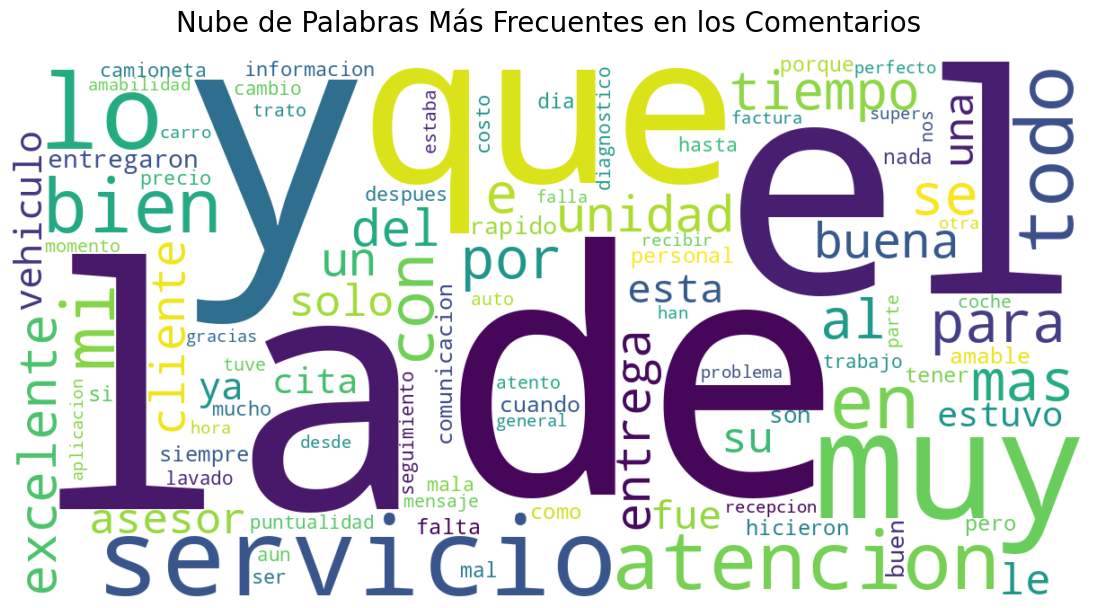

In [91]:
# =============================================================================
# BLOQUE DE GENERACIÓN DE NUBE DE PALABRAS
# Este script visualizará las palabras más frecuentes en los comentarios.
# =============================================================================

# --- 1. IMPORTACIÓN DE LIBRERÍAS ---
# Asegúrate de tener la librería wordcloud. Si no, descomenta la siguiente línea para instalarla.
# !pip install wordcloud

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

print("Librerías para la nube de palabras importadas.")


# --- 2. CARGA Y PREPARACIÓN DE LOS DATOS ---
try:
    # Carga tu archivo CSV principal
    df = pd.read_csv('datos_con_limpieza_manual.csv')
    print(f"Archivo 'datos_con_limpieza_manual.csv' cargado. Total de muestras: {len(df)}")
except FileNotFoundError:
    print("Error: No se encontró el archivo. Asegúrate de que el nombre es correcto.")
    raise

# Limpieza básica de nulos
df.dropna(subset=['comentarios'], inplace=True)

# Unir todos los comentarios en un solo texto largo
# Esto es lo que la nube de palabras usará como fuente.
text = " ".join(comment for comment in df.comentarios)

print(f"\nSe han unido {len(df.comentarios)} comentarios en un solo bloque de texto.")


# --- 3. CONFIGURACIÓN DE LA NUBE DE PALABRAS ---

# Las "stop words" son palabras comunes que no aportan mucho significado y queremos excluir.
# Podemos empezar con el conjunto en español que trae la librería y añadir las nuestras.
# Añadimos palabras que probablemente sean comunes en tu contexto pero no informativas.
stopwords_es = set(STOPWORDS)

# Crear el objeto WordCloud con varias personalizaciones
# - width/height: Tamaño de la imagen generada.
# - background_color: Color del fondo.
# - stopwords: El conjunto de palabras a ignorar.
# - collocations=False: Evita que cuente pares de palabras como una sola (ej. "muy bien").
# - max_words: El número máximo de palabras a mostrar.
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords_es,
    collocations=False,
    max_words=100,
    contour_width=3,
    contour_color='steelblue'
).generate(text)


# --- 4. MOSTRAR LA NUBE DE PALABRAS ---

# Usar matplotlib para mostrar la imagen generada
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # No mostrar los ejes X e Y
plt.title('Nube de Palabras Más Frecuentes en los Comentarios', fontsize=20, pad=20)
plt.show()

In [83]:
# =============================================================================
# BLOQUE DE LIMPIEZA MANUAL DE TEXTO
# Este script procesará la columna 'comentarios' para:
# 1. Convertir a minúsculas.
# 2. Eliminar acentos.
# 3. Eliminar signos de puntuación.
# 4. Eliminar una lista de palabras definidas manualmente por el usuario.
# El resultado se guardará en un nuevo archivo CSV.
# =============================================================================

# --- 1. IMPORTACIÓN DE LIBRERÍAS ---
import pandas as pd
import re
import unicodedata

print("Librerías para limpieza manual importadas.")


# --- 2. CONFIGURACIÓN MANUAL DEL USUARIO ---
# ¡IMPORTANTE! Escribe aquí la lista de palabras que quieres eliminar.
# Escríbelas en minúsculas y sin acentos.
palabras_a_eliminar = {
    
    
}
# Usamos un 'set' porque es mucho más rápido para buscar palabras.

print(f"Se eliminarán {len(palabras_a_eliminar)} palabras definidas manualmente.")


# --- 3. CARGA DE DATOS ---
try:
    # Carga tu archivo CSV original
    df = pd.read_csv('Datos-clasificados2.1.csv')
    print(f"Archivo 'tus_datos_etiquetados.csv' cargado. Total de muestras: {len(df)}")
except FileNotFoundError:
    print("Error: No se encontró el archivo. Asegúrate de que el nombre es correcto.")
    raise

# Asegurarse de que no hay valores nulos en la columna de comentarios
df.dropna(subset=['comentarios'], inplace=True)


# --- 4. DEFINICIÓN DE LA FUNCIÓN DE LIMPIEZA ---
def limpiar_texto_manualmente(texto):
    """
    Función completa para limpiar el texto según las reglas definidas.
    """
    # 1. Convertir a minúsculas
    texto = texto.lower()
    
    # 2. Eliminar acentos
    # Normaliza el texto a su forma descompuesta (letra + acento)
    nfkd_form = unicodedata.normalize('NFD', texto)
    # Se queda solo con los caracteres que no son diacríticos (acentos)
    texto = "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    
    # 3. Eliminar signos de puntuación y caracteres especiales
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    
    # 4. Eliminar las palabras de la lista manual
    # Dividir el texto en palabras
    palabras = texto.split()
    # Crear una nueva lista solo con las palabras que NO están en nuestra lista para eliminar
    palabras_filtradas = [palabra for palabra in palabras if palabra not in palabras_a_eliminar]
    
    # 5. Unir las palabras filtradas de nuevo en una sola cadena de texto
    texto_limpio = " ".join(palabras_filtradas)
    
    return texto_limpio

# --- 5. APLICAR LA FUNCIÓN Y CREAR LA NUEVA COLUMNA ---

print("\nIniciando el proceso de limpieza manual...")
# Aplicar la función a la columna 'comentarios' y guardar el resultado en una nueva columna
df['comentarios'] = df['comentarios'].apply(limpiar_texto_manualmente)
print("¡Limpieza completada!")

# --- 6. EXPORTAR EL NUEVO DATASET ---

nombre_archivo_salida = 'datos_con_limpieza_manual.csv'
# Guardar el DataFrame completo con la nueva columna a un archivo CSV
df.to_csv(nombre_archivo_salida, index=False, encoding='utf-8-sig')

print(f"\nProceso finalizado. El nuevo dataset ha sido guardado como '{nombre_archivo_salida}'")

Librerías para limpieza manual importadas.
Se eliminarán 0 palabras definidas manualmente.
Archivo 'tus_datos_etiquetados.csv' cargado. Total de muestras: 403

Iniciando el proceso de limpieza manual...
¡Limpieza completada!

Proceso finalizado. El nuevo dataset ha sido guardado como 'datos_con_limpieza_manual.csv'
